<h1 style="color: rgb(255,0,0)"> Multiclass Logistic Regression </h1>
<p> &emsp; Using one vs all method on iris dataset taken from sklearn dataset. To visualize the data and the cost functions, use matplotlib. There are four features such sepal length, sepal width, petal length and petal width. Concordantly, there are three different irises such Setosa, Versicolour, and Virginica. </p> 

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize

# load iris dataset 
# X = [sepal length, sepal width, petal length, petal width]
iris = load_iris()
X_init = iris.data
y_init = iris.target

iris_data = pd.DataFrame(X_init, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
iris_target = pd.DataFrame(y_init, columns=['label'])
def flower(x):
    if x == 0:
        return 'Setosa'
    elif x == 1:
        return 'Versicolour'
    else:
        return 'Virginia'

iris_target['label'] = iris_target['label'].apply(flower)

In [23]:
iris = pd.concat([iris_data, iris_target], axis=1)
iris.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [24]:
iris.tail()

,sepal length,sepal width,petal length,petal width,label
145,6.7,3.0,5.2,2.3,Virginia
146,6.3,2.5,5.0,1.9,Virginia
147,6.5,3.0,5.2,2.0,Virginia
148,6.2,3.4,5.4,2.3,Virginia
149,5.9,3.0,5.1,1.8,Virginia


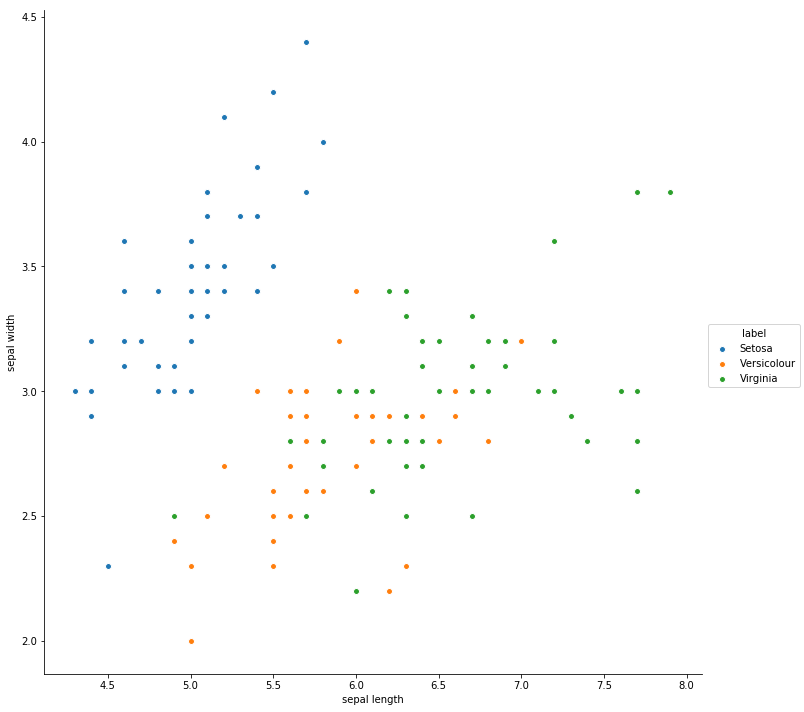

In [28]:
sns.pairplot(data=iris, hue='label', x_vars='sepal length', y_vars='sepal width', size=8)

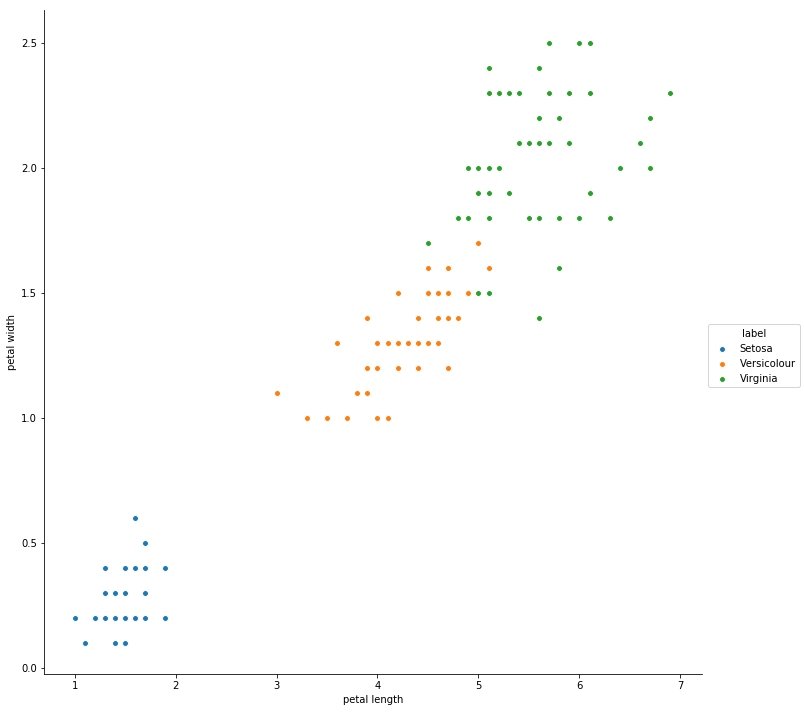

In [29]:
sns.pairplot(data=iris, hue='label', x_vars='petal length', y_vars='petal width', size=10)

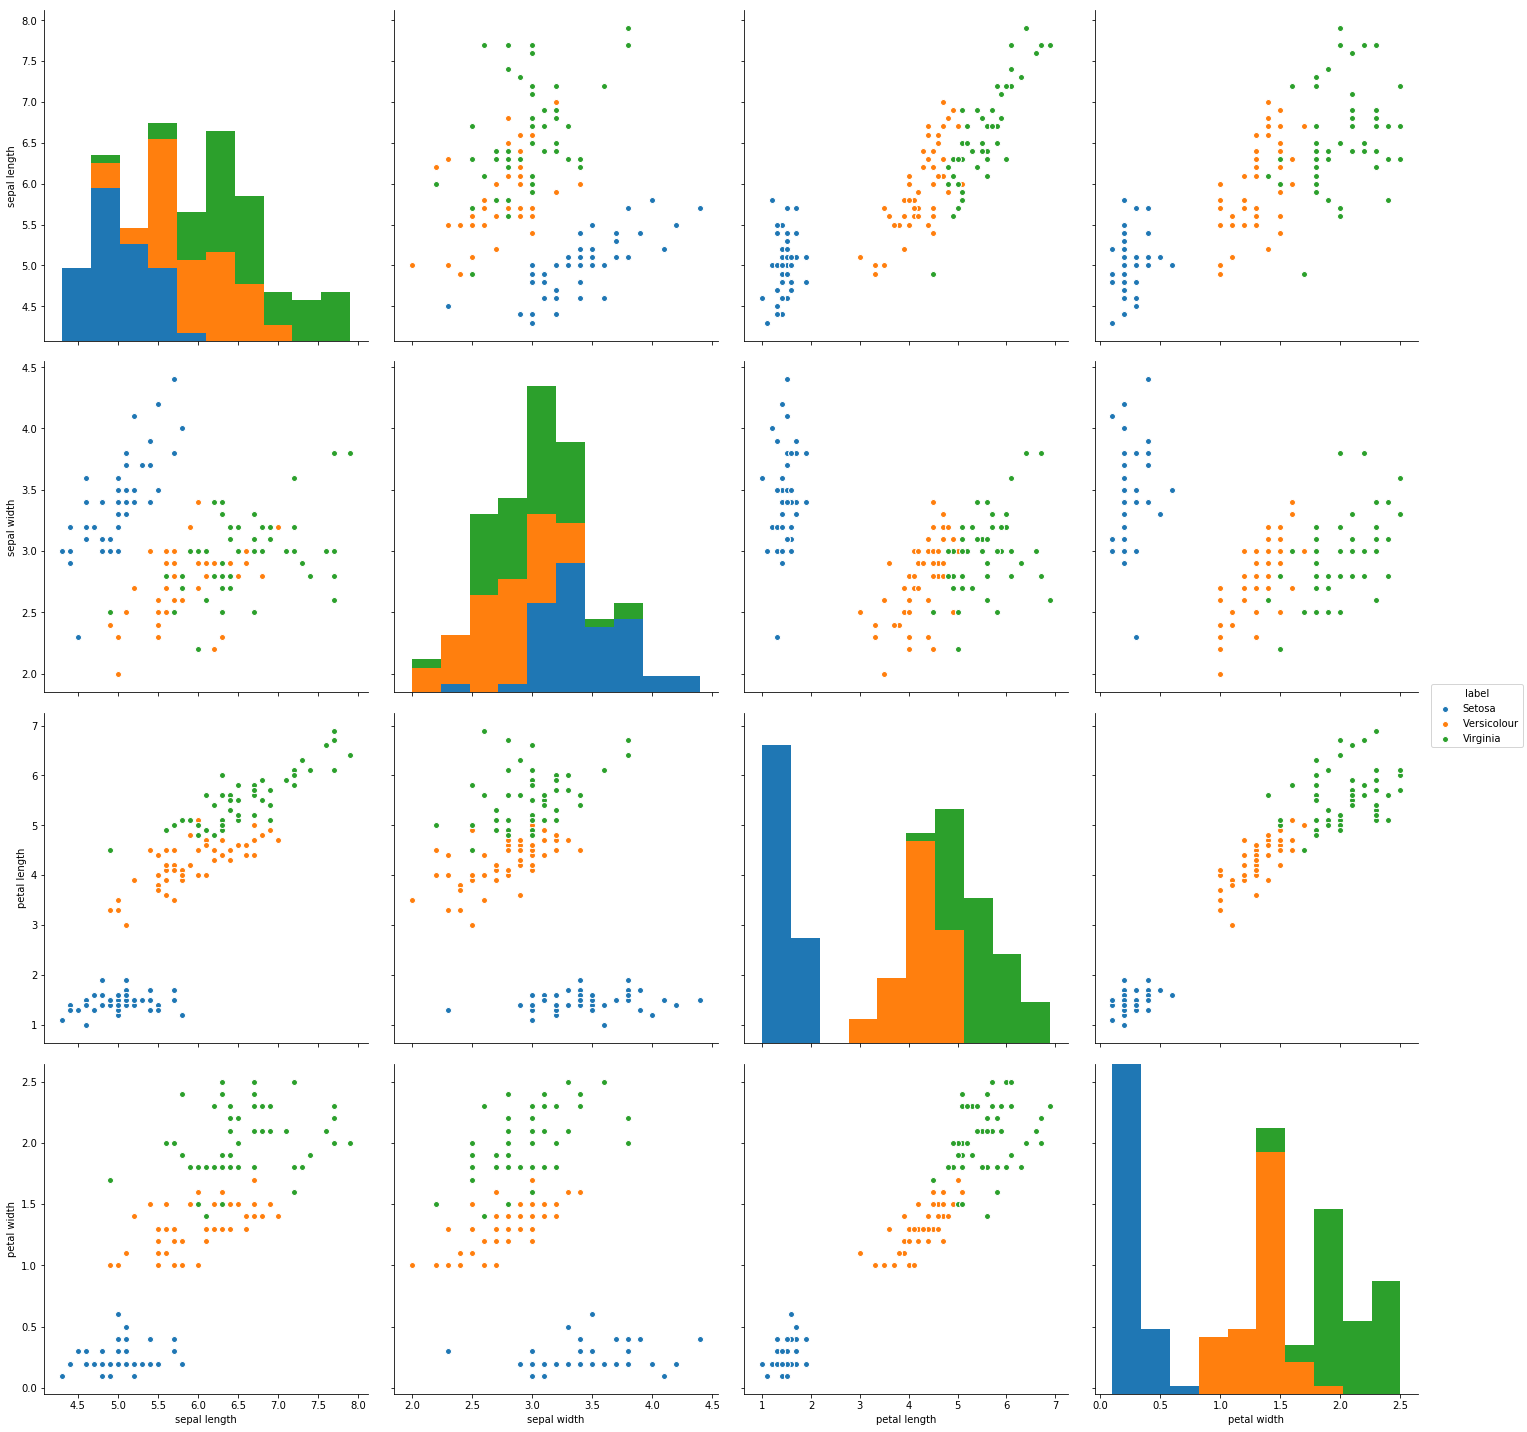

In [31]:
sns.pairplot(iris, hue='label', size=5)

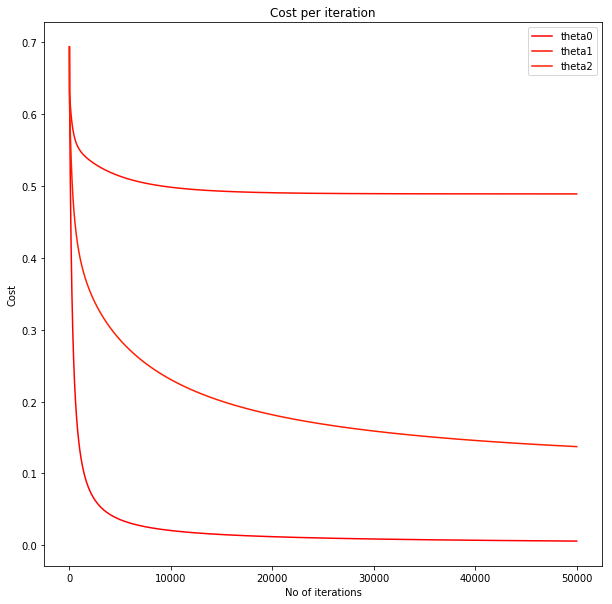

In [143]:
def Sigmoid(z):
    g = 1.0 / (1.0 + np.exp(-z))
    return g

def Hypothesis(X, theta):
    h = Sigmoid(np.dot(X, theta))
    return h 

def CostFunction(X, y, theta, m):
    h = Hypothesis(X, theta)
    cost1 = np.dot(y, np.log(h))
    cost2 = np.dot((1.0 - y), np.log(1.0 - h))
    J = (-1.0 / m)*(cost1 + cost2)
    return J

def GradientDescent(X, y, theta, alpha, num_iters, m):
    costs = []
    for i in range(num_iters):
        costs.append(CostFunction(X, y, theta, m))
        h = Hypothesis(X, theta)
        delta = np.dot(X.T, h-y)
        grad = (alpha/m)*delta
        theta = theta - grad
    costs.append(CostFunction(X, y, theta, m))
    return theta, costs

def Predict(x, theta):
    result = Hypothesis(x, theta)
    if result >= 0.5:
        return 1
    else:
        return 0
    

# Sepal = Train with only sepal length and sepal width
# Petal = Train with only petal length and petal width
# All   = Train with all of the features
def initialize(X, y, ch='Sepal'):
    classes = np.unique(y)
    no_of_classes = len(classes)
    X_size   = X.shape
    y_size   = y.shape[0]
    # First normalize the input, then add one vector to it
    X_train  = normalize(X)
    y_train  = np.zeros((no_of_classes, y_size))
    for i in range(no_of_classes):
        y_tmp = classes[i]
        for j in range(y_size):
            if y_tmp == y[j]:
                y_train[i, j] = 1
    
    ones = np.ones((X_size[0], ))
    if ch == 'Sepal':
        X_train = X_train[:, :2]
        X_train = np.column_stack([ones, X_train])
        theta   = np.zeros((no_of_classes, X_train.shape[1]))
    elif ch == 'Petal':
        X_train = X_train[:, 2:]
        X_train = np.column_stack([ones, X_train])
        theta   = np.zeros((no_of_classes, X_train.shape[1]))
    else:
        X_train = np.column_stack([ones, X_train])
        theta   = np.zeros((no_of_classes, X_train.shape[1]))
    return X_train, y_train, theta


alpha = 1.0
num_iters = 50000
X_train, y_train, theta = initialize(X_init, y_init)
differentClasses = y_train.shape[0]
#theta[0]
costs = []
for i in range(differentClasses):
    theta[i], cost = GradientDescent(X_train, y_train[i], theta[i], alpha, num_iters, X_train.shape[0])
    costs.append(cost)
    
plt.rcParams["figure.figsize"] = (10,10)
N = 100
cmap = plt.cm.get_cmap("hsv", N+1)
colors = ['red', 'green', 'blue']
legendArr = []
for j in range(theta.shape[0]): 
    plt.plot(costs[j], color=cmap(j))
    legendArr.append("theta" + str(j))

plt.legend(legendArr)
plt.xlabel('No of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

In [122]:
dicti = matplotlib.cm.cmap_d.keys()
dicti(0)

TypeError: 'dict_keys' object is not callable

In [141]:
N =5
cmap = plt.cm.get_cmap("hsv", N+1)
cmap.cdict

AttributeError: 'LinearSegmentedColormap' object has no attribute 'cdict'